# Read in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tweets1 = pd.read_csv('../data/venezuela_201901_1_tweets_csv_hashed.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tweets1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961788 entries, 0 to 8961787
Data columns (total 30 columns):
tweetid                     int64
userid                      object
user_display_name           object
user_screen_name            object
user_reported_location      object
user_profile_description    object
user_profile_url            object
follower_count              int64
following_count             int64
account_creation_date       object
account_language            object
tweet_text                  object
tweet_time                  object
tweet_client_name           object
in_reply_to_tweetid         float64
in_reply_to_userid          float64
quoted_tweet_tweetid        float64
is_retweet                  bool
retweet_userid              float64
retweet_tweetid             float64
latitude                    object
longitude                   object
quote_count                 float64
reply_count                 float64
like_count                  float64
retweet_c

In [13]:
tweets1[tweets1["account_language"] == 'en'][["tweet_text","account_language", "hashtags"]].head(25)

,tweet_text,account_language,hashtags
42022,Prefiero Twitter For BlackBerry™ que ÜberTwitter™,en,NaN
42024,@PahoVelasco candela si es de ese color.,en,NaN
46455,RT @archillect: https://t.co/ngucMVrbgN,en,[]
46456,"RT @FCBayernES: 🐻👋📺 ¡Oye, Berni! #FCBWOB https...",en,[FCBWOB]
46796,@Al_lemon_Pie :S hahahaa pregunta para que vea...,en,NaN
46797,@CarlosLG_ Mml xD,en,NaN
47683,"RT @PahoVelasco: Que absurda esa letra, me cos...",en,[]
48443,RT @luisrojas077: https://t.co/nxkmG1ess7,en,[]
48534,@YoSoyMalandra Esperame en la Estacion. RT: @w...,en,[Grrr]
49282,@the_putipuerko Q ladilla Carnal :/ q ladilla ...,en,NaN


In [11]:
tweets1["account_language"].value_counts()

es    8922407
en      35050
pt       4331
Name: account_language, dtype: int64

# Number of Tweets Over Time

In [28]:
df_time = pd.DataFrame(pd.to_datetime( tweets1["tweet_time"] ))

In [29]:
df_time["count"] = 1
df_time.set_index("tweet_time", inplace = True)
df_time.head()

,count
tweet_time,
2016-12-09 18:04:00,1
2017-01-24 12:48:00,1
2017-02-24 03:36:00,1
2017-09-02 14:34:00,1
2016-09-29 01:26:00,1


In [68]:
df_time['year'] = df_time.index.year
df_time['month'] = df_time.index.month
df_time['dayofweek'] = df_time.index.dayofweek

In [73]:
# hourly
hourly = df_time['count'].resample('H').sum()

# # daily
daily = df_time.resample('D').sum()

# # monthly
monthly = df_time['count'].resample('M').sum()

pandas.core.series.Series

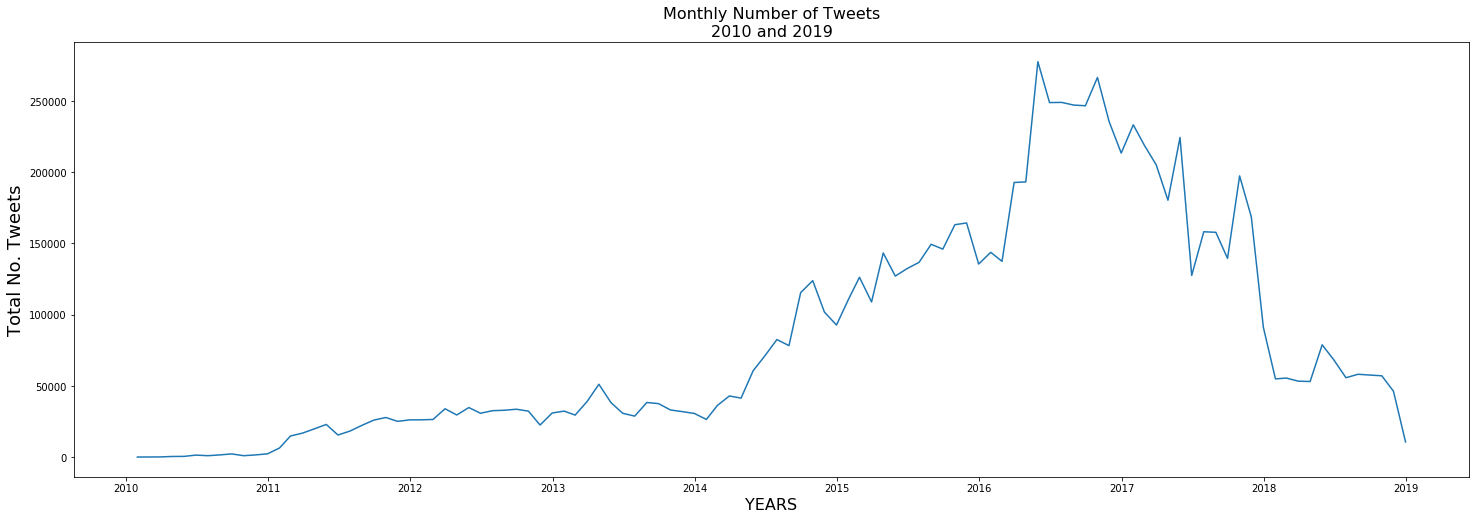

In [80]:
plt.figure(figsize=(25,8))
plt.plot(monthly)
plt.xlabel('YEARS', fontsize = 16)
plt.ylabel('Total No. Tweets', fontsize = 18)
plt.title('Monthly Number of Tweets\n2010 and 2019', fontsize = 16)
plt.savefig('../images/monthly_tweets_overtime.png')

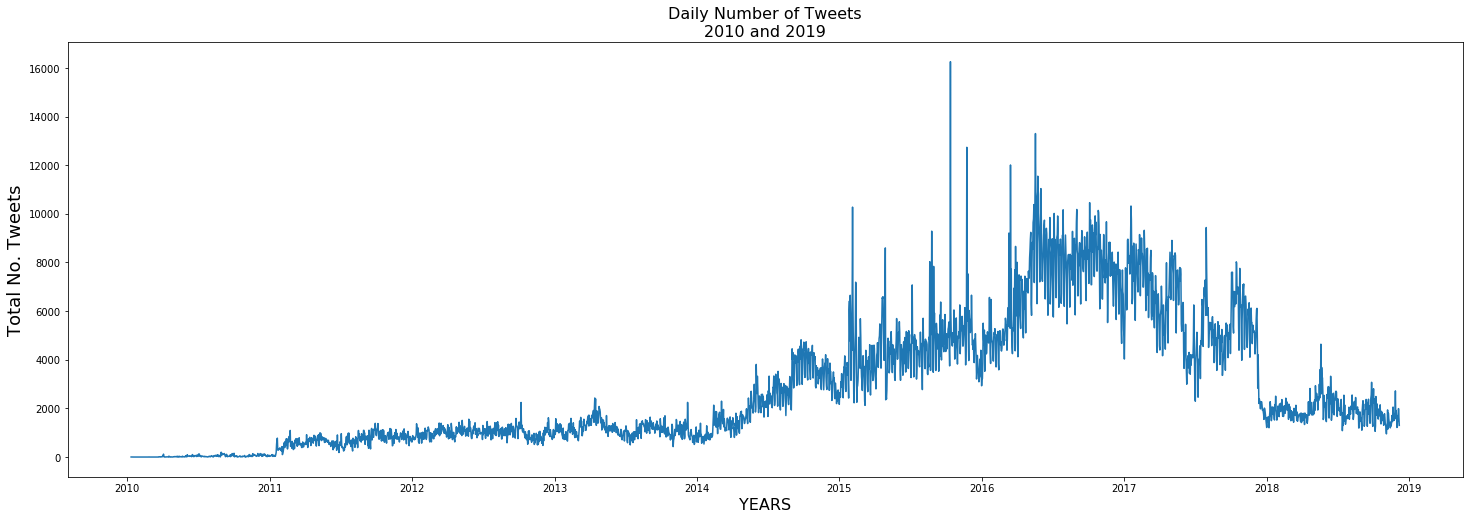

In [79]:
plt.figure(figsize=(25,8))
plt.plot(daily["count"])
plt.xlabel('YEARS', fontsize = 16)
plt.ylabel('Total No. Tweets', fontsize = 18)
plt.title('Daily Number of Tweets\n2010 and 2019', fontsize = 16)
plt.savefig('../images/daily_tweets_overtime.png')

Text(0.5, 1.0, 'Hourly Number of Tweets\n2010 and 2019')

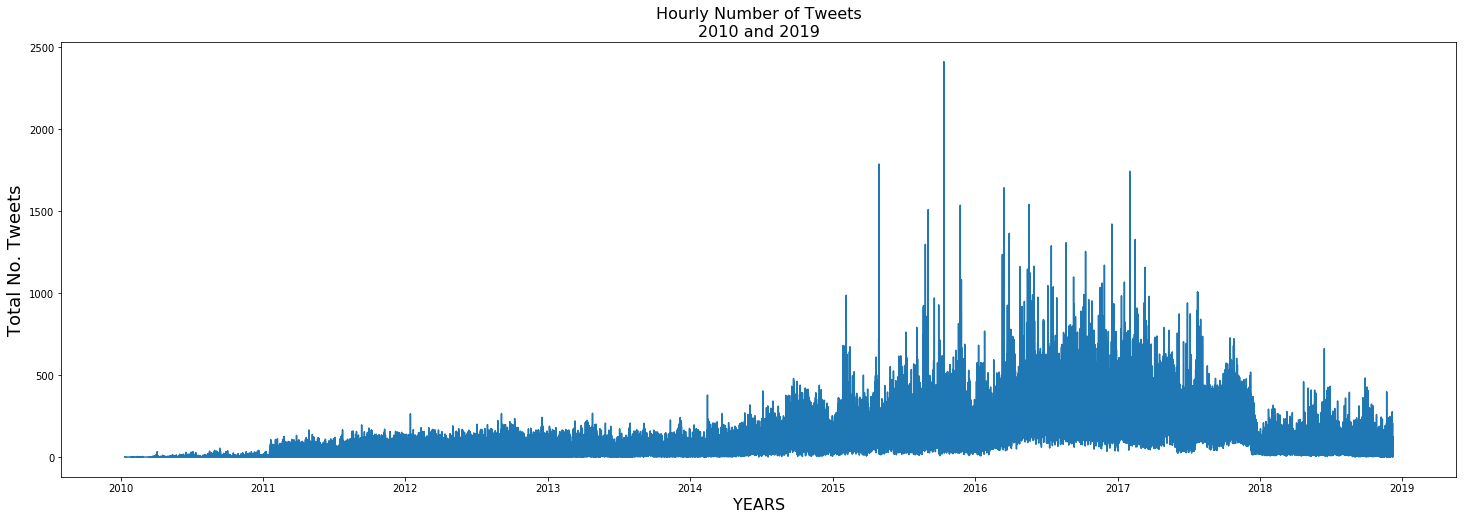

In [66]:
plt.figure(figsize=(25,8))
plt.plot(hourly)
plt.xlabel('YEARS', fontsize = 16)
plt.ylabel('Total No. Tweets', fontsize = 18)
plt.title('Hourly Number of Tweets\n2010 and 2019', fontsize = 16)